In [0]:
import nltk
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from IPython import display

Using TensorFlow backend.


In [0]:
nltk.download('abc')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.


True

In [0]:
abc=nltk.corpus.abc.words()

In [0]:
tkn=Tokenizer()

In [0]:
tkn.fit_on_texts(abc)

In [0]:
seq= tkn.texts_to_sequences(abc)

In [0]:
vlen=len(tkn.word_index)

In [0]:
vlen

27663

In [0]:
from keras.preprocessing.sequence import  skipgrams , make_sampling_table

In [0]:
sampling_table = make_sampling_table(vlen+1)
couples, labels = skipgrams(seq, vlen, window_size=5, sampling_table=sampling_table)

In [0]:
xt1=[]
xt2=[]
for i in couples:
  xt1.append(i[0])
  xt2.append(i[1])

In [0]:
from pandas.core.common import flatten
xt1=list(flatten(xt1))
xt2=list(flatten(xt2))
xt1=np.array(xt1)
xt2=np.array(xt2)

In [0]:
xt1[0] , xt2[0]

(1278, 4905)

In [0]:
from keras.layers import Dense , Flatten , Input , Reshape , dot
from keras.models import Sequential , Model
from keras.layers.embeddings import Embedding
from keras.callbacks import LambdaCallback

In [0]:
wembed_size=128

In [0]:
input_target = Input((1,))
input_context = Input((1,))
embedding = Embedding(vlen+1, wembed_size, input_length=1, name='embedding')

In [0]:
target = embedding(input_target)
target = Reshape((wembed_size, 1))(target)
context = embedding(input_context)
context = Reshape((wembed_size, 1))(context)

In [0]:
dot_product = dot([target, context],axes=1)
dot_product = Reshape((1,))(dot_product)
# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

In [0]:
model = Model(input=[input_target, input_context], output=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
plotcall = LambdaCallback(on_epoch_end=lambda epoch,logs: plot(model))

In [0]:
def plot(model):
  display.clear_output(wait=True)
  emb=model.layers[2].get_weights()[0]
  words_embeddings = {w:emb[idx] for w, idx in tkn.word_index.items()}
  vis=np.array(list(words_embeddings.values())[:100])
  visem = TSNE(n_components=2).fit_transform(vis)
  x,y=visem[:,0],visem[:,1]
  n=list(words_embeddings.keys())[:100]
  
  fig, ax = plt.subplots(figsize=(20,15))
  ax.scatter(x,y)
  for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
  plt.show()
  



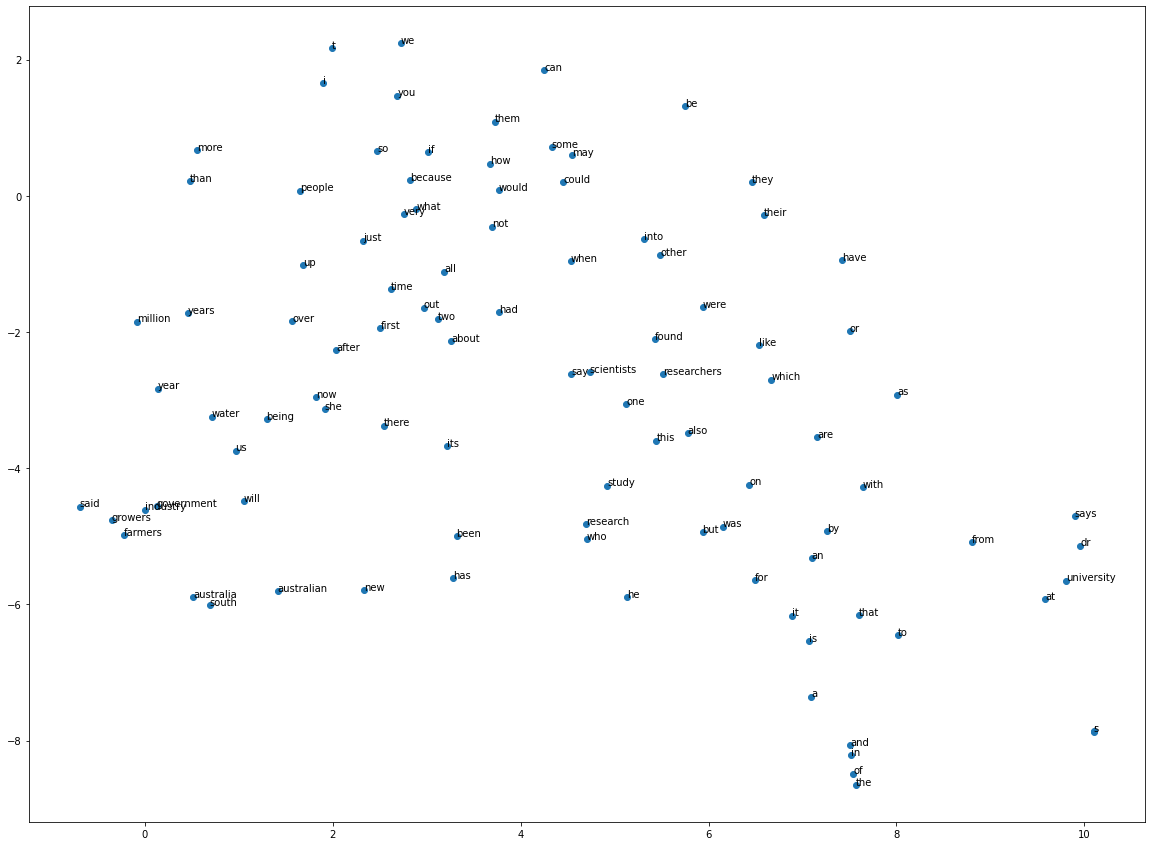

In [0]:
history=model.fit([xt1,xt2],labels,batch_size=6400,epochs=20,callbacks=[plotcall])

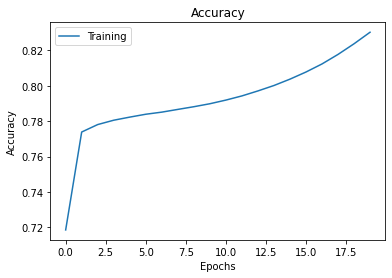

In [0]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

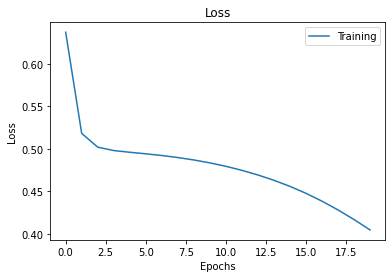

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'],label='Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
import pickle

In [0]:
pickle.dump(model,open('model.obj','wb'))

In [0]:
pickle.dump(words_embeddings,open('wembed.obj','wb'))

NameError: ignored

In [0]:
words_embeddings['market'].shape

In [0]:
plt.show()